In [49]:
import pandas as pd

from msc import config
from msc.dataset.dataset import UniformDataset, get_seizures_index_df
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## Load results

In [42]:
results_df = pd.read_csv('results_1000.csv')

In [36]:
seizures_index_df = get_seizures_index_df(machine='LOCAL')

In [39]:
# load dataset.csv
dataset_dir = r"C:\Users\noam\Repositories\noamsgl\msc\results\epilepsiae\UNIFORM\20220106T165558"
dataset = UniformDataset(dataset_dir)
dataset.add_check_isseizure()
samples_df = dataset.samples_df


loading
done loading


In [40]:
samples_df.

,index,patient_name,window_interval,window_id,fname,label,label_desc,package,patient,x,interval,lower,upper,isseizure
0,0,NaN,"[Timestamp('2008-11-05 23:44:50.105065'),Times...",0,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1328903,"[[-1.9087308122919075e-05, -1.6731470034174078...","[Timestamp('2008-11-05 23:44:50.105065'),Times...",2008-11-05 23:44:50.105065,2008-11-05 23:44:54.011315,False
1,1,NaN,"[Timestamp('2008-09-04 12:25:16.801598'),Times...",1,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1327403,"[[-1.5160393131575873e-06, 2.0316374775494796e...","[Timestamp('2008-09-04 12:25:16.801598'),Times...",2008-09-04 12:25:16.801598,2008-09-04 12:25:20.707848,False
2,2,NaN,"[Timestamp('2008-06-07 03:53:32.359954'),Times...",2,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1325903,"[[3.9097588100887366e-06, 5.574982135175794e-0...","[Timestamp('2008-06-07 03:53:32.359954'),Times...",2008-06-07 03:53:32.359954,2008-06-07 03:53:36.266204,False
3,3,NaN,"[Timestamp('2008-07-06 12:36:55.567208'),Times...",3,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1325003,"[[4.5445032942969996e-05, 2.4568819532406052e-...","[Timestamp('2008-07-06 12:36:55.567208'),Times...",2008-07-06 12:36:55.567208,2008-07-06 12:36:59.473458,False
4,4,NaN,"[Timestamp('2004-02-22 03:04:55.766070'),Times...",4,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surf30,pat_23902,"[[-8.580473091602334e-06, -8.744526908397691e-...","[Timestamp('2004-02-22 03:04:55.766070'),Times...",2004-02-22 03:04:55.766070,2004-02-22 03:04:59.672320,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,"[Timestamp('2008-05-09 08:37:44.578676'),Times...",995,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1233703,"[[-8.315607134128605e-06, 7.245980687299064e-0...","[Timestamp('2008-05-09 08:37:44.578676'),Times...",2008-05-09 08:37:44.578676,2008-05-09 08:37:48.484926,False
996,996,NaN,"[Timestamp('2008-05-19 11:29:03.260274'),Times...",996,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1325903,"[[2.33506265239705e-06, -4.816046294733975e-07...","[Timestamp('2008-05-19 11:29:03.260274'),Times...",2008-05-19 11:29:03.260274,2008-05-19 11:29:07.166524,False
997,997,NaN,"[Timestamp('2004-07-23 06:33:21.771004'),Times...",997,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surf30,pat_30802,"[[3.465939172983167e-05, 3.46406082701683e-05,...","[Timestamp('2004-07-23 06:33:21.771004'),Times...",2004-07-23 06:33:21.771004,2004-07-23 06:33:25.677254,False
998,998,NaN,"[Timestamp('2008-05-03 21:02:49.958375'),Times...",998,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1235103,"[[4.650911066474839e-05, 1.695051204798633e-05...","[Timestamp('2008-05-03 21:02:49.958375'),Times...",2008-05-03 21:02:49.958375,2008-05-03 21:02:53.864625,False


In [50]:
results = results_df.pivot(index='sample_id', columns='param_name', values='param_value').join(samples_df, on='sample_id')

False
True


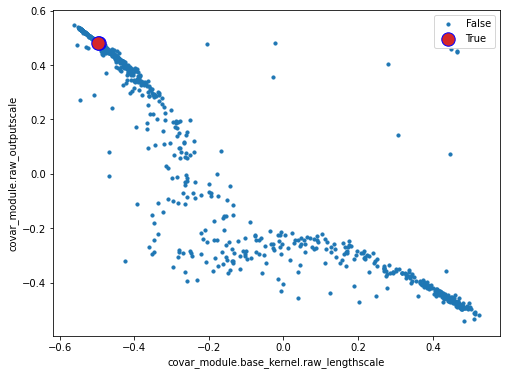

In [104]:
import matplotlib.pyplot as plt
colors = {False:'tab:blue', 'E':'tab:orange', 'F':'tab:green', True:'tab:red', 'H':'tab:purple', 'I':'tab:brown', 'J':'tab:pink'}

sizes = {False: 10, True: 180}
fix, ax = plt.subplots(1,1, figsize=(8,6))
results = results.sort_values('isseizure')
grouped = results.groupby('isseizure')
for key, group in grouped:
    print(key)
    if key:
        group.plot(ax=ax, kind='scatter', x="covar_module.base_kernel.raw_lengthscale", y="covar_module.raw_outputscale", label=key, color=colors[key], s=sizes[key], edgecolor='b')
    else:
        group.plot(ax=ax, kind='scatter', x="covar_module.base_kernel.raw_lengthscale", y="covar_module.raw_outputscale", label=key, color=colors[key], s=sizes[key])
plt.show()

In [ ]:
results['size'] =

<AxesSubplot:xlabel='covar_module.base_kernel.raw_lengthscale', ylabel='covar_module.raw_outputscale'>

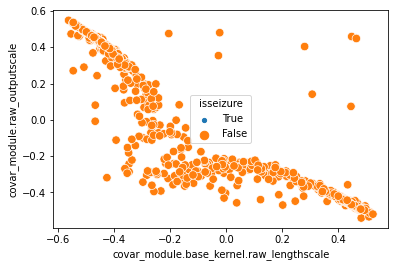

In [66]:
sns.scatterplot(data=results, x="covar_module.base_kernel.raw_lengthscale", y="covar_module.raw_outputscale", hue='isseizure', size='isseizure', hue_order=[True, False])

In [28]:
samples_df.interval.iloc[0]

[Timestamp('2008-11-05 23:44:50.105065'),Timestamp('2008-11-05 23:44:54.011315'))

In [27]:
type(seizures_index_df.interval.iloc[0])

portion.interval.Interval

In [34]:
samples_df[samples_df.isseizure]

,index,patient_name,window_interval,window_id,fname,label,label_desc,package,patient,x,interval,lower,upper,isseizure
850,850,NaN,"[Timestamp('2009-05-17 05:00:34.146397'),Times...",850,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfPA,pat_1320903,"[[6.43577057030321e-05, -8.78918811663256e-05,...","[Timestamp('2009-05-17 05:00:34.146397'),Times...",2009-05-17 05:00:34.146397,2009-05-17 05:00:38.052647,True
971,971,NaN,"[Timestamp('2009-02-10 15:35:51.388255'),Times...",971,C:\Users\noam\Repositories\noamsgl\msc\results...,NaN,NaN,surfCO,pat_2000,"[[4.705574783591755e-06, 9.522076718639352e-06...","[Timestamp('2009-02-10 15:35:51.388255'),Times...",2009-02-10 15:35:51.388255,2009-02-10 15:35:55.294505,True
